In [1]:
from train import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

Current device: cuda


In [3]:
def lhs(size, lb=-1, rb=1):
    res = np.zeros(size)
    length = (rb - lb) / size
    for i in range(size):
        sub_lb = lb + length * i
        sub_rb = lb + length * (i + 1)
        res[i] = np.random.rand() * length + sub_lb
    return res
        

In [4]:
epochs = 5000
lr = 0.001

alpha = lhs(5)
beta = lhs(5)
# print("Alpha: {:.3f}, Beta: {:.3f}".format(alpha, beta))
print(alpha)
print(beta)
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=100, zero_shot=True, alpha_list=alpha, beta_list=beta)

[-0.88836367 -0.34904464 -0.06116544  0.42020435  0.7965898 ]
[-0.83074853 -0.28914893 -0.19338257  0.42989112  0.958687  ]
Current device: cuda
alpha, beta: [0.10399074684683507], [-0.3655387455419521] Val. MSE: 0.002 | alpha, beta: [1.2201943901975543], [1.3465317875706702] Val. OOD MSE: 0.265
alpha, beta: [0.6527621329117368], [0.4148130826084955] Val. MSE: 0.085 | alpha, beta: [1.3226816492891587], [1.3091301688887946] Val. OOD MSE: 0.352
Epoch 100 | Loss_I: nan | Loss_B: 0.4236 | Loss_F: 5.1427


C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


alpha, beta: [-0.12826366608623374], [0.2501717355263713] Val. MSE: 0.013 | alpha, beta: [1.3757105206900486], [1.017245675422835] Val. OOD MSE: 0.306
alpha, beta: [-0.321200499589017], [0.7947702945010555] Val. MSE: 0.033 | alpha, beta: [1.2473107740350524], [1.0487136975232714] Val. OOD MSE: 0.214
Epoch 200 | Loss_I: nan | Loss_B: 0.2873 | Loss_F: 4.2394
alpha, beta: [0.5071724566819167], [-0.003659216149548339] Val. MSE: 0.022 | alpha, beta: [1.219722994535531], [1.139565915777288] Val. OOD MSE: 0.177
alpha, beta: [-0.2986260865655337], [0.8052170586454082] Val. MSE: 0.037 | alpha, beta: [1.1752266051988003], [1.4724511361391892] Val. OOD MSE: 0.130
Epoch 300 | Loss_I: nan | Loss_B: 0.2222 | Loss_F: 3.7790
alpha, beta: [-0.9021508443897217], [0.4114487040582857] Val. MSE: 0.057 | alpha, beta: [1.4268511470190512], [1.2034390616065858] Val. OOD MSE: 0.264
alpha, beta: [0.13369251564753104], [0.7465765029057649] Val. MSE: 0.011 | alpha, beta: [1.3984769773467514], [1.0870367096315272]

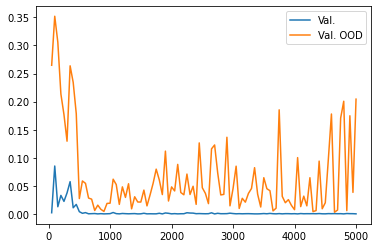

In [10]:
epochs = [50 * i for i in range(1, 101)]
plt.plot(epochs, val_loss, label='Val.')
plt.plot(epochs, val_ood_loss, label='Val. OOD')
# plt.yscale('log')
plt.legend()
plt.show()

In [5]:
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
test_alpha = np.full((100, 1), alpha[2])
test_beta = np.full((100, 1), beta[2])
test_in = np.hstack((test_x, test_alpha, test_beta))
test_u = model(torch.Tensor(test_in).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X


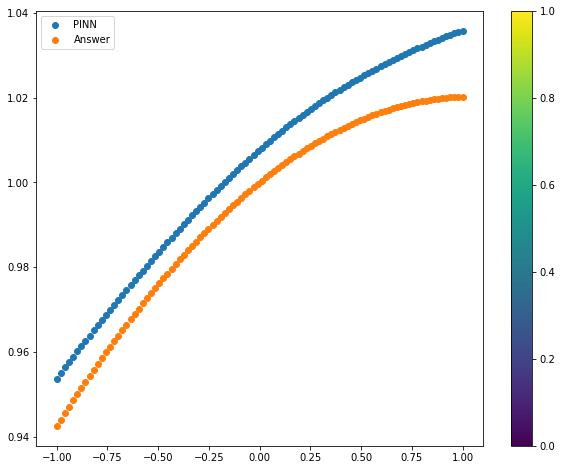

In [6]:
C = test_u.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X, C, label='PINN')
plt.scatter(X, Y, label='Answer')
plt.legend()
plt.colorbar()